<a href="https://colab.research.google.com/github/vknalluri/64061/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Keras Package.

In [3]:
import keras
keras.__version__

'2.8.0'

Importing IMDB Dataset from Keras and splitting the data into Training and Testing sets along with Labels.

We are using the most frequently used 10000 words disregarding the other words.


In [4]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Displaying the Training Data and Training Lables

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

Modifying the data into integers (vectorizing or concerting into tensors)using one hot encoding.

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Displaying the training data after vectorizing

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorization of Labels

In [9]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Building the network (Hypothesis space); 16 nodes in the first hidden layer and 16 nodes in the second hidden layer and 1 node in the output layer.

First two layers use Relu activation and the last layer use Sigmoid as output should give probabilities.


In [10]:
from keras import models
from keras import layers
from keras.layers import Dropout
from keras.constraints import maxnorm

model = models.Sequential()
model.add(Dropout(0.2, input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu',kernel_constraint=maxnorm(3)))
model.add(layers.Dense(16, activation='relu',kernel_constraint=maxnorm(3)))
model.add(layers.Dense(1, activation='sigmoid'))

Implementing Optimizer along with loss function. We will use Binary Crossentropy as the loss function as its the most appropriate one for binary data.

In [11]:

from tensorflow.keras.optimizers import RMSprop

rmsprop = RMSprop(learning_rate=0.1, momentum=0.9)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Creating Validation sets and validation labels from x_train , y_train to test (intermediate testing) the model after training without using the test set yet.

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training the model with a batch size of 512 for 20 epochs.

From the results , we can see that though trainig loss is decreasing for each epoch,  validation loss decreased till 4 epochs and then started to going up afterwards, indicating that 4 epochs are ideal.

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 121ms/step - loss: 0.5499 - accuracy: 0.7471 - val_loss: 0.4171 - val_accuracy: 0.8704
Epoch 2/20
30/30 [==============================] - 3s 86ms/step - loss: 0.3465 - accuracy: 0.8873 - val_loss: 0.3161 - val_accuracy: 0.8896
Epoch 3/20
30/30 [==============================] - 3s 91ms/step - loss: 0.2603 - accuracy: 0.9097 - val_loss: 0.2885 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 3s 94ms/step - loss: 0.2193 - accuracy: 0.9203 - val_loss: 0.2735 - val_accuracy: 0.8916
Epoch 5/20
30/30 [==============================] - 3s 84ms/step - loss: 0.1928 - accuracy: 0.9291 - val_loss: 0.2762 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 3s 89ms/step - loss: 0.1732 - accuracy: 0.9362 - val_loss: 0.3040 - val_accuracy: 0.8798
Epoch 7/20
30/30 [==============================] - 2s 82ms/step - loss: 0.1613 - accuracy: 0.9387 - val_loss: 0.2928 - val_accuracy: 0.8869
Epoch 8/20
3

Displaying the history (part of History object resulting from the training) member.

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotiing the training loss vs validation loss.

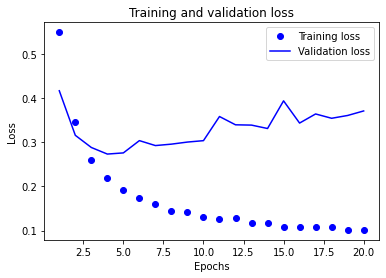

In [15]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotiing the training accuracy vs validation accuracy. Even validation accuracy started to go down after 3 epochs. 

Therefore, model is over fitting after 3/4 epochs. Hence we should stick to a maximum 4 epochs for trainig the model.

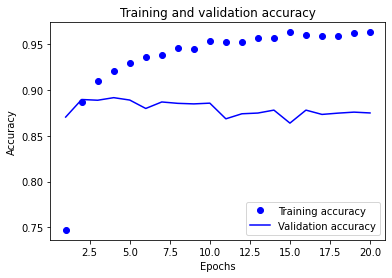

In [16]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Re-training the model with 4 epochs without changing any other (hyper)parameters and then evaluating the model on test data.


In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.4647 - accuracy: 0.8292
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2705 - accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2074 - accuracy: 0.9268
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3087 - accuracy: 0.8768


Displaying the accuracy and loss on test data. accuracy is at 88%.

In [18]:
results

[0.3086718022823334, 0.876800000667572]

Predicting the output probabilities for the test data. Probability is as high as 0.99 for some and very poor for some.

In [19]:
model.predict(x_test)

array([[0.16366974],
       [0.99905634],
       [0.6301286 ],
       ...,
       [0.09937429],
       [0.04858908],
       [0.46389464]], dtype=float32)

1. There is no change in the results if we decrease one hidden layer. However, if we add another layer then the validation loss is going up after 3 epochs and accuracy is also going down after 3 epochs.

2. When we decrease the nodes from 16 to 8 then the optimal epochs are seen at 5 , where as if we increase the node size to 32 its seen at 2 and also a bit of zig zag results.

3. when MSE is used as loss function optimal is seen at 4 epochs.

4. When tanh activation is used validation loss is going up after 3 epochs and accuracy is going down after 3 epochs.

5.After applying drop out validation loss is going up after 4 epochs and so accuracy is decreasing. Nevertheless, test accuracy has dropped a bit.

Dropout rate is 20% and learniong rate is increased by 0.9 from the default rate of 0.01.
Note: All the comments are for the original settings


